<div  align="center">
    <img src="./files/Waterloo.gif" width="20%" height="20%"> 
</div>

<div align="center">
    <font size='6' color='blue'><b>Convolutional Neural Network</b></font><br/>
    <font size='3' color='blue'><b>(Code Example)</b></font><br/>
    <font size='3' color='blue'><b>Ali Ghodsi</b></font>
</div>


# Introduction
In this tutorial we will train a simple Convolutional Neural Network in following five steps:
    - Step 1)  Import libraries and set parameters
    - Step 2) Load and prepare data
    - Step 3) Model Definition
    - Step 4) Compiling model
    - Step 5) Learning model and fit it on training data

Also we will see how to:
    - Save and load learned models
    - Predit labels of test data
    - Check accuracy of model

# Step 1)  Import libraries and set parameters

First, we will import the necessary libraries and packages that are needed for Convolutional Neural Network.<br /><br />
<b>1) Numpy: </b> NumPy is the fundamental package for scientific computing with Python<br />
<b>2) keras </b><br />
<b>3) Sequential model type:</b> This provides  linear stack of neural network layers and it is usefull in MLP and CNN nets.<br />
<b>4) "core" layers (Dense, Dropout, Activation, Flatten): </b> These layers are used in most neural networks. <br />
<b>5) datasets: </b> Keras contains a set of datasets and we can import them in our projects. Here we imported <b>cifar10</b> dataset.<br />
<b>6) Convolutional and Maxpooling layers </b><br />
<b>7) ImageDataGenerator: </b> It will be used for data augmentation.<br />
<b>8) pyplot from matplotlib: </b> It will used for plotting figures and images.<br />
<b>9) utilities: </b> It will be used for converting labels to one hot encoding.<br />


In [1]:
import numpy as np                                               # 1)
import keras                                                     # 2)
from keras.models import Sequential                              # 3)
from keras.layers import Dense, Dropout, Activation, Flatten     # 4)
from keras.datasets import cifar10                               # 5)
from keras.layers import Conv2D, MaxPooling2D                    # 6)
from keras.preprocessing.image import ImageDataGenerator         # 7)
import matplotlib.pyplot as plt                                  # 8)
from keras.utils import np_utils                                 # 9)

Using TensorFlow backend.


### Some preprations

In [2]:
# (%matplotlib inline) is a backend available only for the Jupyter Notebook and it 
# will help to display output of plotting commands inside the Jupyter Notebook.
%matplotlib inline      


np.random.seed(2017)    # This line sets a seed for random generator. 
                        # This allows us to reproduce the results from our script.

### Set some parameters

In [3]:
batch_size = 256      #batch size
num_classes = 10      #number of classes
epochs = 100          #epoch size

# Step 2) Load and prepare data

In [4]:
# Here, we load cifar10 dataset.
# x_train: train data
# y_train: train label
# x_test: test data
# y_test: test label
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 


print('train data shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

train data shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Prepare data

In [5]:
#Typecast data samples to flot32. It is usefull when using GPU.
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

# Scale pixles of data samples between 0 and 1.
x_train /= 255
x_test /= 255

### Plot some sample images from dataset

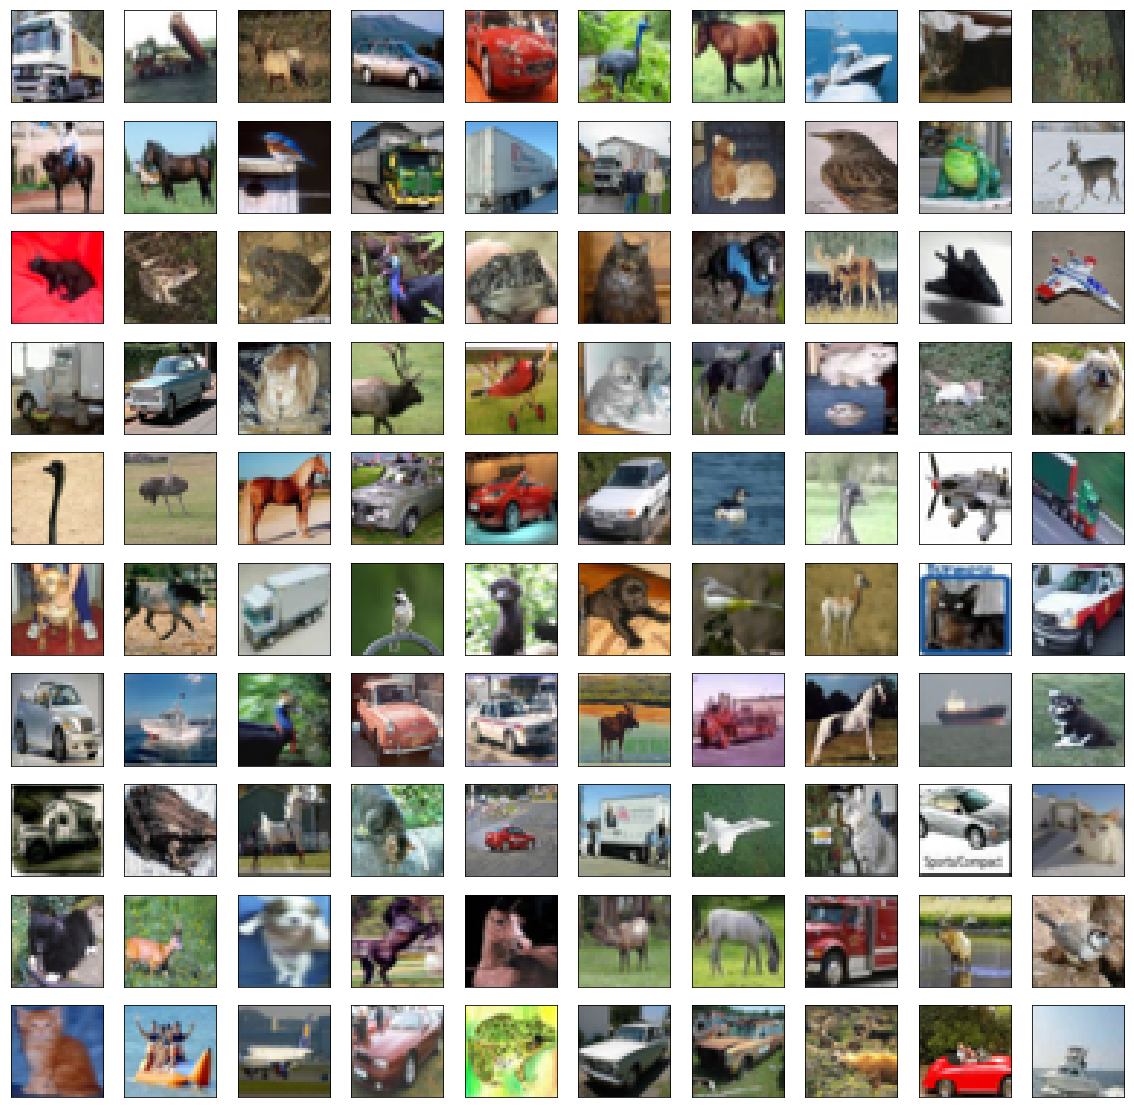

In [7]:
plt.figure()                                      # create new figure
fig_size = [20, 20]                               # specify figure size
plt.rcParams["figure.figsize"] = fig_size         # set figure size

#Plot firs 100 train image of dataset
for i in range(1,101):                          
    ax = plt.subplot(10, 10, i)                   # Specify the i'th subplot of a 10*10 grid
    img = x_train[i,:,:,:]                        # Choose i'th image from train data
    ax.get_xaxis().set_visible(False)             # Disable plot axis.
    ax.get_yaxis().set_visible(False)
    plt.imshow(img)
    
plt.show()

### Preprocess class labels

In [8]:
y_train = np_utils.to_categorical(y_train, num_classes)#convert train labels to one hot encoding
y_test = np_utils.to_categorical(y_test, num_classes)  #convert test labels to one hot encoding

### Data Augmentation
Data Augmentation is optional in Convolutional Neural Networks. But it has significant effects on the network and increases the test accuracy of the model. Data augmentation is a method which augments data samples via a number of random transformations, Therefore the model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better. This technique is very useful when we have small number of training samples.

For more information watch this video from Andrew Ng: https://www.coursera.org/learn/convolutional-neural-networks/lecture/AYzbX/data-augmentation 

#### Keras Image Augmentation API <sup>[4]</sup>

Like the rest of Keras, the image augmentation API is simple and powerful.

Keras provides the "ImageDataGenerator" class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

    - Sample-wise standardization.
    - Feature-wise standardization.
    - ZCA whitening.
    - Random rotation, shifts, shear and flips.
    - Dimension reordering.
    - Save augmented images to disk.
    
By assigning <b>True</b> value or numeric value to each parameter of following function, you can enable the desired feature.

In [9]:
# "datagen" will be used later for generating data in learning phase
datagen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=0,        # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
vertical_flip=False)             # randomly flip images

# Step 3) Model Definition

Here, we will define a very simple Convolutional Neural Network, consist of three convolutional, MaxPooling and Dropout layers. Also, it ends up with two dense layers. ReLU activation function is used in all layers. A softmax layer is used in the last layer of the network.<br /><br />
Kernel size of each convolutional layer is:<br />
Conv1 ===> 3 &#10005; 3 &#10005; 3 (we have 20 kernels in this size for the first convolutional layer)<br />
Conv2 ===> 3 &#10005; 3 &#10005; 20 (we have 50 kernels in this size for the second convolutional layer)<br />
Conv3 ===> 3 &#10005; 3 &#10005; 50 (we have 100 kernels in this size for the third convolutional layer)<br />

<div align="center">
<img src="./files/CNN2.png"> 
</div>
</div>
<div align="center">

In [10]:
model = Sequential()    # Specify that our model type is sequential

# First convolutional layer
model.add(Conv2D(20, (3, 3), padding='same',activation = 'relu',  input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))       # MaxPooling  Window size is 2*2
model.add(Dropout(0.25))                        # Dropout layer with rate 0.25

# Second convolutional layer
model.add(Conv2D(50, (3, 3), padding='same', activation = 'relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling  Window size is 2*2
model.add(Dropout(0.25))                         # Dropout layer with rate 0.25

# Third convolutional layer
model.add(Conv2D(100, (3, 3), activation = 'relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling  Window size is 2*2
model.add(Dropout(0.25))                         # Dropout layer with rate 0.25

model.add(Flatten())
model.add(Dense(512, activation = 'relu',))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

# Step 4) Compiling model
In this step, we define the loss function, optimization method and the metric we will use when the model is learning.

In [11]:
model.compile(loss='categorical_crossentropy',    # categorical_crossentropy is used as loss function
              optimizer='Adagrad',                # Adagrad is used as optimization method
metrics=['accuracy'])

### Summary of model
The following function prints a summary of whole network architecture.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        9050      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 100)         45100     
__________

# Step 5) Learning model and fit it on training data

In [27]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
validation_data=(x_test, y_test))

Epoch 1/100
195/195 [==============================] - 131s - loss: 1.9019 - acc: 0.3009 - val_loss: 1.6140 - val_acc: 0.4217
Epoch 2/100
195/195 [==============================] - 118s - loss: 1.5755 - acc: 0.4257 - val_loss: 1.3643 - val_acc: 0.5131
Epoch 3/100
195/195 [==============================] - 115s - loss: 1.4529 - acc: 0.4738 - val_loss: 1.2901 - val_acc: 0.5340
Epoch 4/100
195/195 [==============================] - 114s - loss: 1.3828 - acc: 0.5002 - val_loss: 1.2395 - val_acc: 0.5568
Epoch 5/100
195/195 [==============================] - 119s - loss: 1.3290 - acc: 0.5193 - val_loss: 1.1901 - val_acc: 0.5670
Epoch 6/100
195/195 [==============================] - 121s - loss: 1.2894 - acc: 0.5395 - val_loss: 1.1965 - val_acc: 0.5689
Epoch 7/100
195/195 [==============================] - 117s - loss: 1.2617 - acc: 0.5468 - val_loss: 1.0926 - val_acc: 0.6109
Epoch 8/100
195/195 [==============================] - 112s - loss: 1.2355 - acc: 0.5596 - val_loss: 1.1043 - val_acc:

## Save and load model
After training model it can be saved with <b>model.save()</b> function.<br />
Also you can load a pretrained model by using <b>keras.models.load_model()</b> function

In [13]:
# This function saves the model in 'cnn.h5' file
#Note: Uncomment it in the case of saving the trained model.

# model.save('./cnn.h5')

In [14]:
# You can load a pretrained model by using this function.
model = keras.models.load_model('./cnn.h5')

## Predit labels of test data

In [15]:
# This function of trained model predicts the label of its input data
prd = model.predict(x_test) 

In [20]:
# These lines are used for converting one hot coding back to the original label form.
prd_y = np.argmax(prd, axis=1)
y_test_orig = np.argmax(y_test, axis=1)

# print predicted and true lables of first 10 test samples
print('Predicted Labels:\t', prd_y[0:10])
print('True labels:\t\t', y_test_orig[0:10])

Predicted Labels:	 [3 8 8 0 6 6 1 6 3 1]
True labels:		 [3 8 8 0 6 6 1 6 3 1]


## Check accuracy of model

In [22]:
nb_correct_labels = np.sum(prd_y == y_test_orig)
print('Test accuracy is: ', nb_correct_labels/len(y_test))

Test accuracy is:  0.7422



## References

1) https://github.com/fchollet/keras-resources <br />
2) https://keras.io <br />
3) https://blog.keras.io <br />
4) https://machinelearningmastery.com/image-augmentation-deep-learning-keras/<br />